# **Titanic Hayatta Kalma Tahmini**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

titanic_url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(titanic_url)

In [ ]:
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
# Cabinde NaN değeri fazla bu yüzden bu sütunu silelim
df.drop('Cabin', axis=1, inplace=True)

In [ ]:
## Embarked 2 eksik değer içeriyor, Doldurulabilir. Kategorik alanların eksiklerini doldurmak için en iyi yöntem mod kullanmak.
mode_embarked = df['Embarked'].mode()[0]

df['Embarked'] = df['Embarked'].fillna(mode_embarked)

In [ ]:
### Age sayısal sütundur. ve %19.8 eksik değer içerir. Doldurmak için medyan kullanalım. Çünkü yaş dağılımı muhtelemen aykırı değer -
### içerir, ve medyan ortalamaya göre aykırı değerlere daha dayanıklıdır.

median_age = df['Age'].median()

df['Age'] = df['Age'].fillna(median_age)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


Text(0.5, 1.0, 'Yaş Aykırı Değerler (Box Plot)')

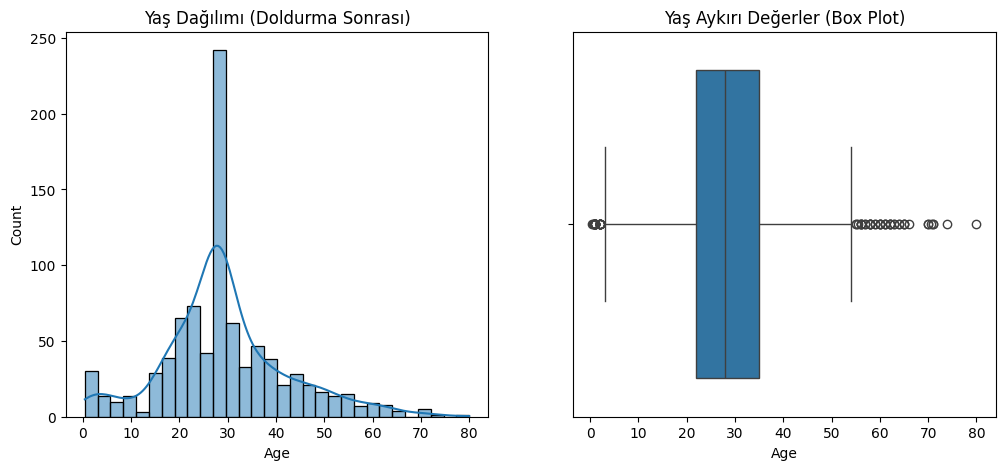

In [ ]:
#### OUTLİER KONTROLÜ
# Sürekli sayısal sütunlar için uygulanır.
## Hist and boxplot apply for outlier control

plt.figure(figsize=(12, 5))
plt.subplot(1,2,1)
sns.histplot(df['Age'], kde=True,bins=30)
plt.title('Yaş Dağılımı (Doldurma Sonrası)')

plt.subplot(1,2,2)
sns.boxplot(x=df['Age'])
plt.title('Yaş Aykırı Değerler (Box Plot)')

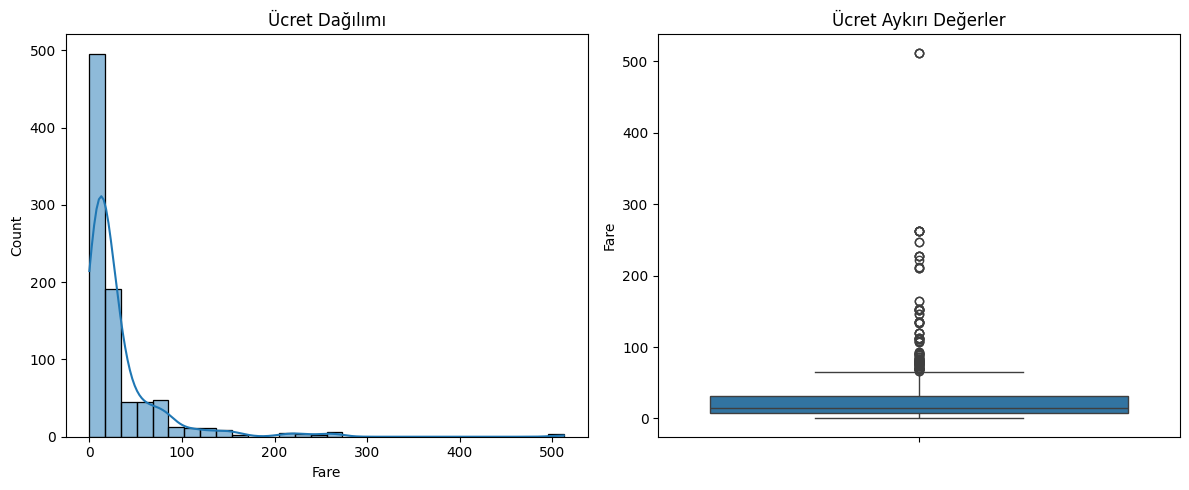

In [ ]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['Fare'], kde=True, bins=30)
plt.title('Ücret Dağılımı')

plt.subplot(1, 2, 2)
sns.boxplot(y=df['Fare'])
plt.title('Ücret Aykırı Değerler')

plt.tight_layout()
plt.show()

Hem Histogram hem de Kutu Grafiği, verinin dağılımını ve sürekli değerlerindeki aykırı uç noktaları göstermek için tasarlanmıştır

. Bu nedenle, sadece SÜREKLİ SAYISAL sütunlar için uygundur.



Kategorik veriler de neden boxplot ve histplot kullanmadık?
Bu sütunlar sayı değil grup/etiket içerir.
Box Plot veya Hist Plot, bu veriler üzerinde anlamsızdır.
Count Plot (Sayım grafiği) kullanılabilir.








Ayrık sayısal sütunlar ve ikili sütunlar için neden kullanmadık?



Bu sütunlar sadece belirli, tam sayı değerleri alır. Bunlarda teknik olarak aykırı değer bulunabilir, ancak dağılımları Hist Plot için uygun değildir.


Survived -- 0/1 --- Hedef Değişken olduğu için dağılımına bakılmaz, sınıf dengesizliği kontrol edilir (Count Plot).  



In [ ]:
### Aykırı değerlerden arındırma (Capping) işlemi
## Outlier temizliğinin nedeni modelin yanlı öğrenmesini engellemektir.
# IQR kuralına uyuyoruz.

def cap_outliers_iqr(df,col):
   Q1= df[col].quantile(0.25)
   Q3= df[col].quantile(0.75)
   IQR=Q3-Q1

   lower_bound=Q1-(1.5*IQR)
   upper_bound=Q3+(1.5*IQR)

   df[col]=np.where(df[col]>upper_bound,upper_bound,df[col])
   df[col]=np.where(df[col]<lower_bound,lower_bound,df[col])

   return df


In [ ]:
df=cap_outliers_iqr(df,'Age')
df = cap_outliers_iqr(df, 'Fare')

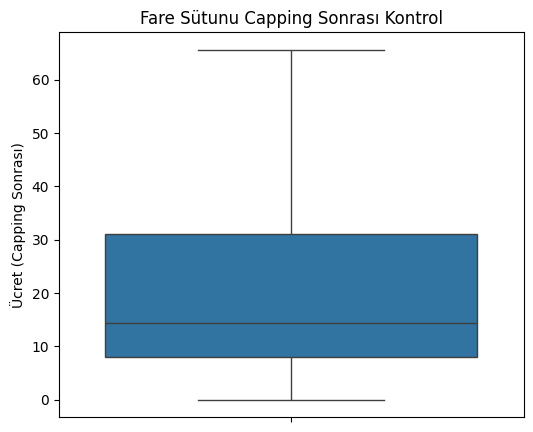

In [ ]:
""" Tekrar kontrol edelim """
plt.figure(figsize=(6,5))
sns.boxplot(df['Fare'])
plt.title('Fare Sütunu Capping Sonrası Kontrol')
plt.ylabel('Ücret (Capping Sonrası)')
plt.show()


Makine öğrenimi algoritmaları çoğunlukla yalnızca sayısal verilerle çalışır. Bu nedenle, Sex (male/female) ve Embarked (limanlar) gibi metinsel verileri sayısal formata dönüştürmemiz gerekir.

Sex sütunu sadece iki değer içerir: male ve female. Bu tür sıralı olmayan, iki kategorili veriler için Label Encoding kullanılır.

In [ ]:
df['Sex'] = df['Sex'].map({'male': 1, 'female': 0})

Embarked (S, C, Q) üç değer içerir ve bu değerler arasında bir sıralama yoktur. Bu tür Nominal veriler için One-Hot Encoding kullanılır.

In [ ]:
df=pd.get_dummies(df,columns=['Embarked'],drop_first=True)

In [ ]:
df = pd.get_dummies(df, columns=['Pclass'], drop_first=True, prefix='PClass')

In [ ]:
# Yeni bir 'FamilySize' (Aile Büyüklüğü) sütunu oluşturalım. (+1 yolcunun kendisi)

df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

In [ ]:
# 'SibSp' ve 'Parch' artık birleştirildiği için onları veri setinden çıkarabiliriz.

df.drop(['SibSp', 'Parch'], axis=1, inplace=True)

In [ ]:
## Modelin eğitmek için gereksiz olan sütunları silelim

cols_to_drop = ['PassengerId', 'Name', 'Ticket']

df.drop(cols_to_drop, axis=1, inplace=True)

In [ ]:
df.columns

Index(['Survived', 'Sex', 'Age', 'Fare', 'Embarked_Q', 'Embarked_S',
       'PClass_2', 'PClass_3', 'FamilySize'],
      dtype='object')

# Feature Scaling
Veri setimizdeki sayısal sütunlar (Age, Fare, FamilySize) hala farklı değer aralıklarına sahiptirler.

Age ve Fare gibi büyük aralıklı sütunlar, küçük aralıklı (örneğin 0 ve 1) One-Hot Encoding sütunlarına göre model tarafından haksız yere daha önemli algılanabilir.

Amacımız, bu sütunların hepsini aynı standarda (ölçeğe) getirmektir.

In [ ]:
from sklearn.preprocessing import StandardScaler

cols_to_scale = ['Age', 'Fare', 'FamilySize']

scaler = StandardScaler()

# fit_transform ile Standardizasyon (Ortalama 0, Standart Sapma 1) uyguluyoruz.

df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

print("Son Sütunlar (Ölçekli Veri):")
print(df.head())

Son Sütunlar (Ölçekli Veri):
   Survived  Sex       Age      Fare  Embarked_Q  Embarked_S  PClass_2  \
0         0    1 -0.583432 -0.820552       False        True     False   
1         1    0  0.742685  2.031623       False       False     False   
2         1    0 -0.251903 -0.787578       False        True     False   
3         1    0  0.494038  1.419297       False        True     False   
4         0    1  0.494038 -0.781471       False        True     False   

   PClass_3  FamilySize  
0      True    0.059160  
1     False    0.059160  
2      True   -0.560975  
3     False    0.059160  
4      True   -0.560975  


Normalizasyon da, Standardizasyon gibi, Özellik Ölçeklendirmenin (Feature Scaling) temel yöntemlerinden biridir.

Standardizasyon veriyi ortalama 0 ve standart sapma 1 olacak şekilde dönüştürürken, Normalizasyon veriyi belirli bir aralığa, genellikle 0 ile 1 arasına sıkıştırır.

In [ ]:
from sklearn.model_selection import train_test_split

# X (Özellikler): 'Survived' dışındaki tüm sütunları seçer
X = df.drop('Survived', axis=1)

# y (Hedef Değişken)
y = df['Survived']

# Veri setini %80 Eğitim ve %20 Test olarak bölme
# random_state=42, tekrarlanabilirlik sağlar.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Eğitim seti boyutu (X_train): {len(X_train)} gözlem")
print(f"Test seti boyutu (X_test): {len(X_test)} gözlem")

Eğitim seti boyutu (X_train): 712 gözlem
Test seti boyutu (X_test): 179 gözlem


In [ ]:
##### TRAİN #####
# 1. Algoritmayı kütüphaneden çağırıyoruz
from sklearn.linear_model import LogisticRegression

# 2. Modeli oluşturuyoruz (Boş bir öğrenci gibi düşünün)
# random_state=42: Öğrenme sürecindeki rastgelelikleri sabitler, her seferinde aynı sonucu alalım diye.
model = LogisticRegression(random_state=42)

# 3. Modeli EĞİTİYORUZ
# .fit() komutu "uydurmak/öğrenmek" demektir.
model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [ ]:
##### TEST #####
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 1. SINAV: Test verisiyle tahmin yap (Modelin cevapları)
y_pred = model.predict(X_test)

# 2. PUANLAMA: Modelin cevaplarını gerçek cevaplarla karşılaştır
accuracy = accuracy_score(y_test, y_pred)

print(f"--- GENEL BAŞARI ---")
print(f"Test Seti Doğruluk Skoru (Accuracy): %{accuracy*100:.2f}")

# 3. DETAYLI KARNE
print("\n--- KAFA KARIŞIKLIĞI MATRİSİ (Confusion Matrix) ---")
# Sol Üst: Doğru bildiği ölümler | Sağ Üst: Yanlışlıkla yaşıyor dediği ölümler
# Sol Alt: Yanlışlıkla öldü dediği yaşayanlar | Sağ Alt: Doğru bildiği yaşayanlar
print(confusion_matrix(y_test, y_pred))

print("\n--- SINIFLANDIRMA RAPORU ---")
print(classification_report(y_test, y_pred))

--- GENEL BAŞARI ---
Test Seti Doğruluk Skoru (Accuracy): %79.33

--- KAFA KARIŞIKLIĞI MATRİSİ (Confusion Matrix) ---
[[90 15]
 [22 52]]

--- SINIFLANDIRMA RAPORU ---
              precision    recall  f1-score   support

           0       0.80      0.86      0.83       105
           1       0.78      0.70      0.74        74

    accuracy                           0.79       179
   macro avg       0.79      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179



# Sınıflandırma Metrikleri

Confusion Matrix: Her şeyin temeli bu tablodur.

4 ihtimal vardır.

              \Modelin Kararı       Hasta(1)     Sağlıklı(0)
     Gerçek Durum
       Hasta (1)               TP(True Positive)    FN (False Negative)         
       Sağlıklı(0)             FP (False Positive)    TN (True Negative)

$$\text{Accuracy} = \frac{\text{Doğru Bildiklerim (TP + TN)}}{\text{Tüm Hastalar}}$$

## Accuracy (Doğruluk)


Soru: Toplamda ne kadar başarılıyım?

Veri dengesizse (imbalanced) Accuracy'ye asla güvenme!






$$\text{Precision} = \frac{\text{TP}}{\text{TP} + \text{FP (Boş Alarmlar)}}$$

## Precision (Kesinlik)

Doktor "Kansersin" dediğinde, buna ne kadar güvenmeliyim? (Yalancı Çoban Hikayesi)

Amaç: Yanlış alarmları (FP) azaltmak.

$$\text{Recall} = \frac{\text{TP}}{\text{TP} + \text{FN (Gözden Kaçanlar)}}$$

## Recall (Duyarlılık / Kapsama)

Gerçek hastaların kaçını yakalayabildim? (Kaçak Var mı?)


Amaç: Gözden kaçanları (FN) sıfıra indirmek.


$$\text{F1 Score} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}$$

## F1-Score (Denge)

Precision ve Recall zıt çalışır. Birini artırırsan diğeri genelde düşer. İkisinin ortasını nasıl bulurum?

Bu, iki değerin Harmonik Ortalamasıdır. Aritmetik ortalama almayız çünkü harmonik ortalama, değerlerden biri çok düşükse sonucu hemen düşürür. Yani F1 Score yüksekse, hem Precision hem Recall dengeli bir şekilde iyidir demektir.



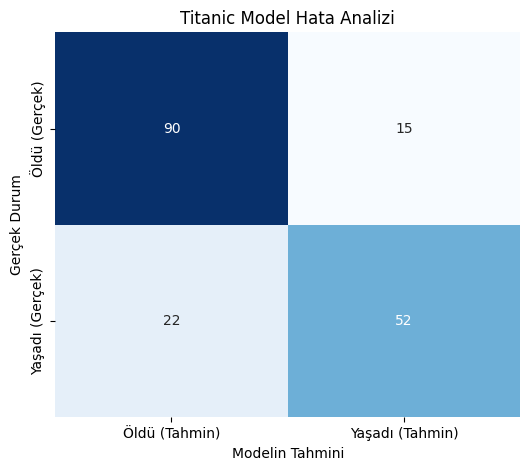

In [ ]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Öldü (Tahmin)', 'Yaşadı (Tahmin)'],
            yticklabels=['Öldü (Gerçek)', 'Yaşadı (Gerçek)'])
plt.xlabel('Modelin Tahmini')
plt.ylabel('Gerçek Durum')
plt.title('Titanic Model Hata Analizi')
plt.show()

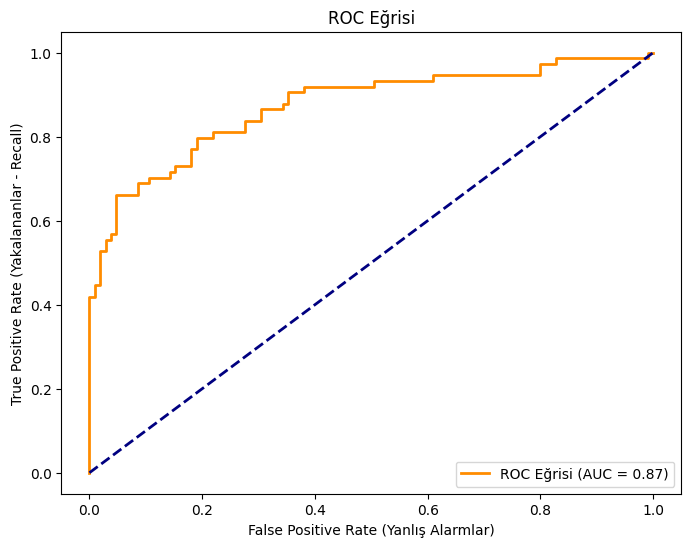

In [ ]:
from sklearn.metrics import roc_curve, auc

# Olasılık değerlerini al (Sadece 1 olma ihtimalleri)
y_prob = model.predict_proba(X_test)[:, 1]

# FPR ve TPR hesapla
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Eğrisi (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (Yanlış Alarmlar)')
plt.ylabel('True Positive Rate (Yakalananlar - Recall)')
plt.title('ROC Eğrisi')
plt.legend(loc="lower right")
plt.show()

# AUC Değeri Nasıl Hesaplanır?   (Alan Hesabı)

AUC (Area Under Curve), o turuncu çizginin altında kalan toplam alandır.Matematiksel olarak bu bir integral hesabıdır


 ($\int_{0}^{1} TPR(x) dx$), ama mantığı şudur:

Bu grafik ve AUC değeri, modelinizin "zekasını" ve "kararlılığını" ölçen en profesyonel araçtır.

Grafikten Ne Anlam Çıkarmalıyım?


Senin grafiğine baktığında şunları görmelisin:

Kavisin Şekli: Çizgi ne kadar sol üst köşeye yakınsa (yay gibi gerginse), model o kadar iyidir. Eğer çizgi ortadaki kesikli çizgiye yakınsa model başarısızdır.

Model Seçimi: İleride başka bir model (örneğin Random Forest) denediğinde onun da çizgisini aynı grafiğe ekleyebilirsin.

Hangi çizgi diğerinin üzerindeyse, o model daha iyidir.

Eşik Kararı: Grafiğe bakarak projen için en uygun noktayı seçebilirsin.

"Benim için yanlış alarm (X ekseni) önemli değil, yeter ki herkesi yakalayayım (Y ekseni yüksek olsun)" diyorsan, grafiğin sağ tarafına yakın bir eşik seçersin.

ROC Grafiği Nasıl Çizilir? (Adım Adım Hesaplama)
Bilgisayar arka planda şu işlemi yapar:

Sıralama: Tüm yolcuları, modelin verdiği "Yaşama İhtimaline" göre büyükten küçüğe dizer.

Eşik Kaydırma: Eşik değerini (Threshold) 1.0'dan başlatıp yavaş yavaş 0.0'a doğru indirir.

Nokta Koyma: Her eşik değeri için iki şeyi hesaplar ve grafiğe bir nokta koyar:

Y Ekseni (TPR - True Positive Rate): Suçluların yüzde kaçını yakaladık? (Yüksek olması iyi)

X Ekseni (FPR - False Positive Rate): Masumların yüzde kaçına yanlışlıkla "suçlu" dedik? (Düşük olması iyi)

Grafiğin Sol Alt Köşesi: Eşik çok yüksek (Kimseye alarm çalmıyor). Hiçbir suçlu yakalanmadı, hiç yanlış alarm yok.

Grafiğin Sağ Üst Köşesi: Eşik çok düşük (Herkese alarm çalıyor). Herkes yakalandı ama herkes şüpheli.

İdeal Nokta (Sol Üst Köşe): Tüm suçlular yakalandı (TPR=1) ve hiç yanlış alarm yok (FPR=0).